#### Spectroscopic Data Analysis
        Sean Keenan, PhD Physics
        Quantum Memories Group, Heriot-Watt University, Edinburgh
        2021

In [1]:
# import packages and initialise OSA to use
import matplotlib.pyplot as mp
import seabreeze as sb
from seabreeze.spectrometers import list_devices, Spectrometer
import numpy as np
from spec_funcs import check_str
import re

spec = Spectrometer.from_first_available()

Set measurement parameters & collect data

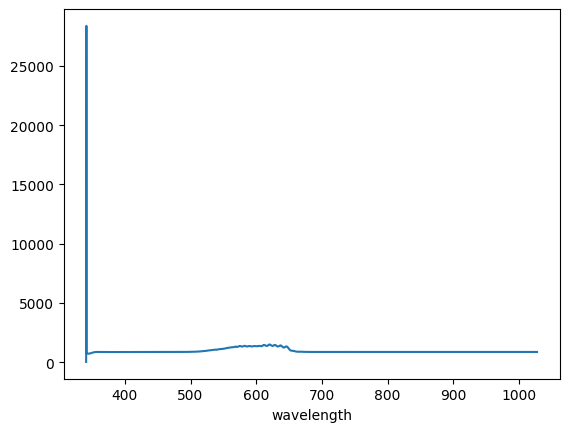

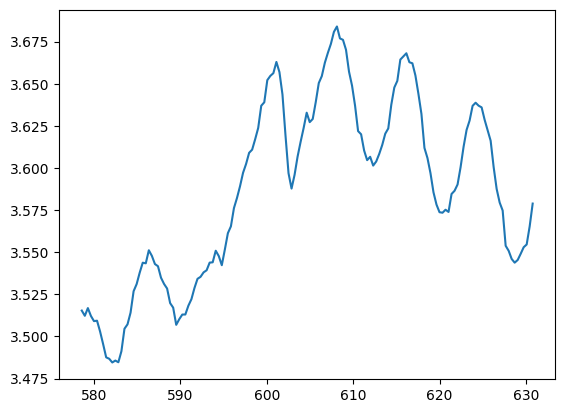

In [93]:
# choose to save
save = True
polarisation = "174"
temp = "160K"
# instant OD calculation
OD_Calc = True
ref_file = polarisation + "_R.txt"
ref_folder = "0215 Check Position\\References"
Start = 650
Stop = 800
# set integration time
spec.integration_time_micros(1000) # microseconds
averages = 1000
# folder & file to save data to 
dir = 'C:\\Users\\sk88\\Desktop'
folder = '20230215 Check Position\\' + temp
raw_file = polarisation + ".txt"
path = dir + '\\' + folder + '\\' + raw_file

if OD_Calc == True:
    dataset = dir + '\\' + ref_folder + '\\' + ref_file
    ref_wave = []
    ref_I = []
    with open(dataset, 'r', newline='') as raw_file:
        for row in raw_file:
            if check_str(row) == True:
                temp = re.split('\t|,|;', row)
                ref_wave.append(float(temp[0]))
                ref_I.append(float(temp[1]))
        raw_file.close()

# get wavelengths
wavelength = spec.wavelengths()
intensities = []

for index in range(averages):
    intensities.append(spec.intensities())

new = 0
for array in intensities:
    new += array

intensity = new / averages

mp.plot(wavelength, intensity)
mp.xlabel('wavelength')

data = np.stack((wavelength, intensity), axis=1)

if save == True:
    with open(path, 'x') as new_file:
        for line in data:
            new_file.write(str(line[0]) + '\t' + str(line[1]) + '\n')
        new_file.close()

if OD_Calc == True:
    corrected = [x*1.5 for x in ref_I]
    OD = np.log(ref_I/intensity)
    mp.figure()
    mp.plot(wavelength[Start:Stop], OD[Start:Stop])